<a href="https://colab.research.google.com/github/Chris-o99/tensorflow/blob/master/cnn_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
235/235 [==============================] - 74s 313ms/step - loss: 0.2770 - val_loss: 0.1697
Epoch 2/5
235/235 [==============================] - 72s 306ms/step - loss: 0.1548 - val_loss: 0.1415
Epoch 3/5
235/235 [==============================] - 72s 306ms/step - loss: 0.1364 - val_loss: 0.1300
Epoch 4/5
235/235 [==============================] - 72s 305ms/step - loss: 0.1280 - val_loss: 0.1237
Epoch 5/5
235/235 [==============================] - 72s 306ms/step - loss: 0.1227 - val_loss: 0.1190


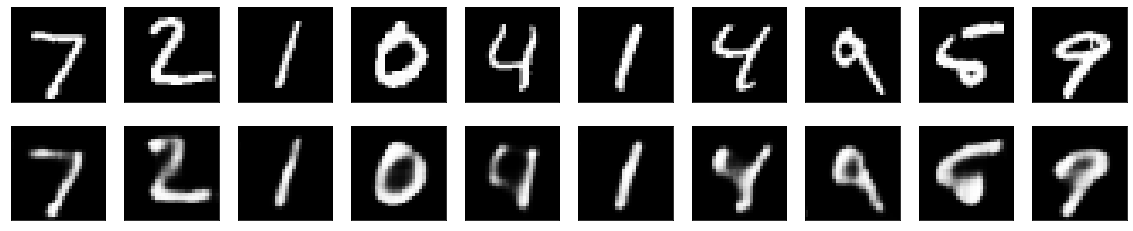

In [5]:
  
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


# this is the size of our encoded representations
encoding_dim = 32 # from 784 to 32 compression




#create encoder-part with shape 784->128->64->32
encoded_input = Input(shape=(28, 28, 1))
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_input)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

#create encoder-moderl from encoding layer
encoder = Model(encoded_input, encoded)

#create decoder-part with shape 32->64->128->784
decodedInput = Input(shape=(4, 4, 8))
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(decodedInput)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation='relu')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

#create decoder-model from decoding layer
decoder = Model(decodedInput,decoded)


# this model maps an input to its reconstruction
autoencoder_input = Input(shape=(28, 28, 1))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img)




# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model

# create the decoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()